In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Index
1. Dataset description
2. Exploratory data analysis (EDA)
3. Data Preprocessing and Normailzation
4. Feature Engineering
5. Model Building
6. ROC Curve
7. conclusion

## 1.Dataset description
1. Age : Age of the patient
2. Sex : Sex of the patient
3. exang: 운동 유발 협심증 (1 = 예, 0 = 아니요)
4. ca:  주요선박 수(0-3)
5. cp : Chest Pain type 흉통형

 1) Value 1: typical angina(일반적 협심증)
 
 2) Value 2: atypical angina(전형적 협심증)
 
 3) Value 3: non-anginal pain(비혈관 통증)
 
 4) Value 4: asymptomatic(증상 없음)
6. trtbps : 휴식 혈압(mmHg)
7. chol : BMI 센서를 통해 가져온 mg/dl 단위의 콜레스테롤
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
9. rest_ecg : 휴식 심전도 결과

 1) Value 0: normal
 
 2) Value 1: ST-T파 이상(T파 반전 및/또는 ST 상승 또는 0.05mV 이상)
 
 3) Value 2: 에스테스 기준에 의한 가능성 있는 또는 확실한 좌심실 비대증 표시
 
10. thalach : 최대 심박수 달성
11. target : 0 = 심장마비 확률이 낮음 1 = 심장마비 확률이 높음

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2. Exploratory data analysis (EDA)
### 1) 숫자 데이터의 경우
분포를 이해하기 위해 히스토그램 작성

코러플롯

여러 숫자 변수의 생존율을 비교하는 피벗 테이블
### 2) 범주형 데이터의 경우
클래스 균형을 이해하기 위한 막대 차트 작성

생존과의 관계를 이해할 수 있는 피벗 테이블 만들기

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.describe().columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
#숫자, 범주형 변수 분리
data_num=data[['age','trtbps','chol','thalachh','oldpeak']]
data_cat=data[['sex','cp','fbs','restecg','exng']]

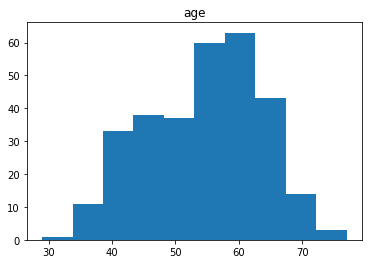

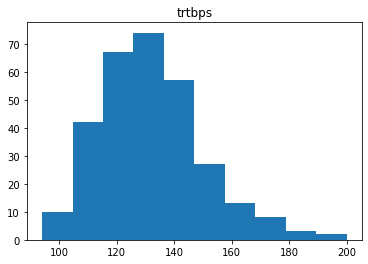

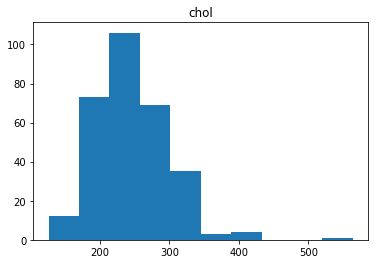

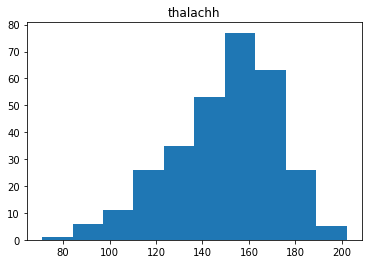

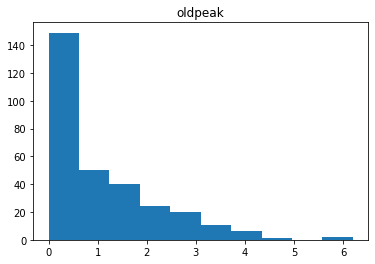

In [10]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

               age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000


<AxesSubplot:>

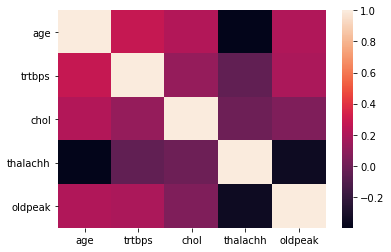

In [12]:
print(data_num.corr())
sns.heatmap(data_num.corr())

In [14]:
pd.pivot_table(data,index='output',values=data_num)

,age,chol,oldpeak,thalachh,trtbps
output,,,,,
0,56.601449,251.086957,1.585507,139.101449,134.398551
1,52.496970,242.230303,0.583030,158.466667,129.303030


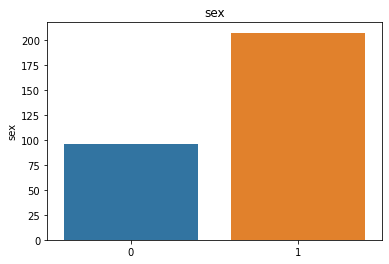

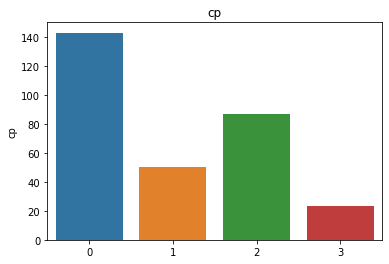

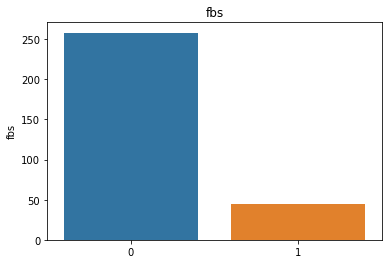

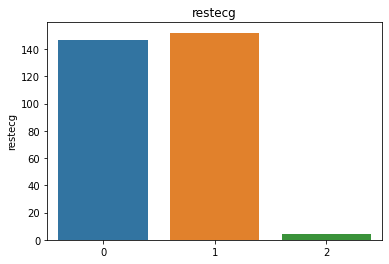

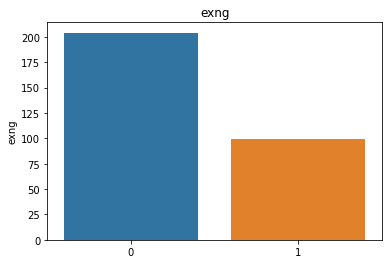

In [15]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

In [16]:
print(pd.pivot_table(data,index='output',columns='sex',values='age'))
print('='*100)
print(pd.pivot_table(data,index='output',columns='cp',values='age'))
print('='*100)
print(pd.pivot_table(data,index='output',columns='fbs',values='age'))
print('='*100)
print(pd.pivot_table(data,index='output',columns='restecg',values='age'))
print('='*100)
print(pd.pivot_table(data,index='output',columns='exng',values='age'))
print('='*100)

sex             0          1
output                      
0       59.041667  56.087719
1       54.555556  50.903226
cp              0          1          2          3
output                                            
0       56.298077  57.444444  58.500000  55.142857
1       54.076923  50.024390  52.217391  56.187500
fbs             0          1
output                      
0       56.362069  57.863636
1       51.901408  56.173913
restecg          0          1     2
output                             
0        57.291139  55.660714  56.0
1        53.823529  51.312500  76.0
exng            0          1
output                      
0       57.048387  56.236842
1       52.316901  53.608696


In [17]:
print(pd.pivot_table(data,index='output',columns='sex',values='chol'))
print('='*100)
print(pd.pivot_table(data,index='output',columns='cp',values='chol'))
print('='*100)
print(pd.pivot_table(data,index='output',columns='fbs',values='chol'))
print('='*100)
print(pd.pivot_table(data,index='output',columns='restecg',values='chol'))
print('='*100)
print(pd.pivot_table(data,index='output',columns='exng',values='chol'))
print('='*100)

sex              0           1
output                        
0       274.958333  246.061404
1       256.750000  230.989247
cp               0           1          2           3
output                                               
0       251.932692  263.444444  239.00000  253.714286
1       245.333333  240.682927  244.26087  229.875000
fbs              0           1
output                        
0       250.094828  256.318182
1       242.612676  239.869565
restecg           0           1           2
output                                     
0        255.227848  243.517857  283.333333
1        255.044118  233.625000  197.000000
exng             0           1
output                        
0       246.967742  254.447368
1       242.485915  240.652174


## 3. 데이터 전처리 및 정규화
백분위수 기법을 사용하여 열을 정규화합니다.

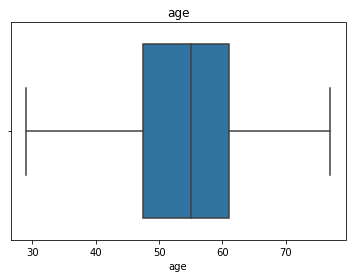

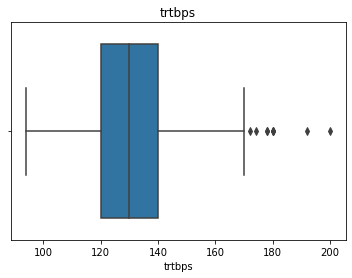

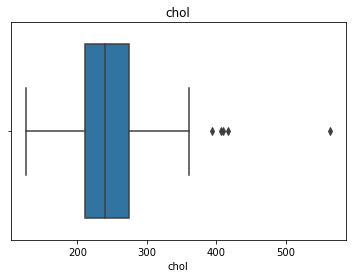

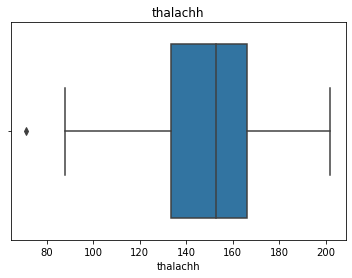

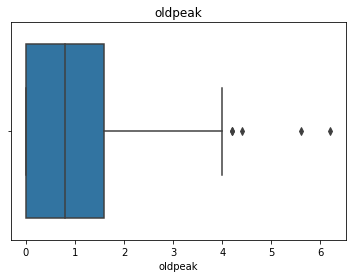

In [18]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [19]:
def outlinefree(dataCol):
    sorted(dataCol)
    # IQR(사분위간 범위)을 얻는 데 도움이 되는 25번과 27번 백분위수를 얻는 것
    Q1,Q3=np.percentile(dataCol,[25,75])
    
    IQR=Q3-Q1
    
    LowerRange=Q1-(1.5*IQR)
    
    UpperRange=Q3+(1.5*IQR)
    
    return LowerRange,UpperRange

In [20]:
lwtrtbps,uptrtbps=outlinefree(data['trtbps'])
lwchol,upchol=outlinefree(data['chol'])
lwoldpeak,upoldpeak=outlinefree(data['oldpeak'])

In [21]:
data['trtbps'].replace(list(data[data['trtbps']>uptrtbps].trtbps),uptrtbps,inplace=True)
data['chol'].replace(list(data[data['chol']>upchol].chol),upchol,inplace=True)
data['oldpeak'].replace(list(data[data['oldpeak'] > upoldpeak].oldpeak) ,upoldpeak,inplace=True)

## 4. Feature Engieering

In [22]:
features=data.iloc[:,:-1].values
label=data.iloc[:,-1].values

## 5. Model Building
데이터셋의 기본 파라미터로 다양한 모델의 성능을 확인하고 F1 점수를 확인하고 싶습니다.

1. LogisticRegression 0.9268292682926829
2. K-Nearest Neighbor(KNN) 0.7865168539325843
3. support vector classification 0.7999999999999999
4. naive bayes 0.9090909090909092

f1 score : 정밀도와 재현율의 평균, 2 * 정밀도 * 재현율 / (정밀도+재현율)

precision score(정밀도) : 분류기가 눈이 많이 내릴 것이라고 예측한 날 중에 실제로 눈이 많이 내린 날의 비율 tp/(tp+fp)

recall score(재현율) : 실제로 정답이 True 인 것들 중에서 분류기가 True로 예측한 비율이다. 그래서 애초에 True가 발생하는 확률이 적을 때 사용하면 좋다. tp/(tp+fn)

confusion matrix : 알고리즘의 성능을 평가할때 평가하는 지표로 사용

In [25]:
#LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.25,random_state=102)

classimodel=LogisticRegression()
classimodel.fit(X_train,y_train)
trainscore=classimodel.score(X_train,y_train)
testscore=classimodel.score(X_test,y_test)

print('test score : {}, train score : {}'.format(testscore,trainscore),'\n')

y_pred=classimodel.predict(X_test)

confusion_matrix(y_test,y_pred)

test score : 0.9210526315789473, train score : 0.8281938325991189 



array([[32,  2],
       [ 4, 38]], dtype=int64)

In [26]:
print('f1 score : ',f1_score(y_test,y_pred),'\n')
print('precision score : ',precision_score(y_test,y_pred),'\n')
print('recall score : ',recall_score(y_test,y_pred),'\n')
print(classification_report(y_test,y_pred))

f1 score :  0.9268292682926829 

precision score :  0.95 

recall score :  0.9047619047619048 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.95      0.90      0.93        42

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



In [28]:
#K-Nearest Neighbor(KNN)
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.25,random_state=193)

classifier=KNeighborsClassifier()
knnmodel=classifier.fit(X_train,y_train)

trainscore=knnmodel.score(X_train,y_train)
testscore=knnmodel.score(X_test,y_test)

print('test score : {}, train score : {}'.format(testscore,trainscore),'\n')

y_predknn=knnmodel.predict(X_test)
print(confusion_matrix(y_test,y_predknn))

test score : 0.75, train score : 0.748898678414097 

[[22 10]
 [ 9 35]]


In [29]:
print('f1_score : ',f1_score(y_test,y_predknn),'\n')
print('precision_score : ',precision_score(y_test,y_predknn),'\n')
print('recall_score : ',recall_score(y_test,y_predknn),'\n')
print(classification_report(y_test,y_predknn))

f1_score :  0.7865168539325843 

precision_score :  0.7777777777777778 

recall_score :  0.7954545454545454 

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.78      0.80      0.79        44

    accuracy                           0.75        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.75      0.75      0.75        76



In [30]:
#naive bayes
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.25,random_state=34)

NBmodel=GaussianNB()
NBmodel.fit(X_train,y_train)

trainscore=NBmodel.score(X_train,y_train)
testscore=NBmodel.score(X_test,y_test)

print('test score : {}, train score : {}'.format(testscore,trainscore),'\n')
y_predNB=NBmodel.predict(X_test)
print(confusion_matrix(y_test,y_predNB))

test score : 0.8947368421052632, train score : 0.8370044052863436 

[[28  5]
 [ 3 40]]


In [31]:
print('f1_score : ',f1_score(y_test,y_predNB),'\n')
print('precision_score : ',precision_score(y_test,y_predNB),'\n')
print('recall_score : ',recall_score(y_test,y_predNB),'\n')
print(classification_report(y_test,y_predNB))

f1_score :  0.9090909090909092 

precision_score :  0.8888888888888888 

recall_score :  0.9302325581395349 

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.89      0.93      0.91        43

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [32]:
#support vector classification
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.25,random_state=8)

svcmodel=SVC(probability=True)# predict_proba() 메서드를 제공
svcmodel.fit(X_train,y_train)

trainscore=svcmodel.score(X_train,y_train)
testscore=svcmodel.score(X_test,y_test)

print('test score : {}, train score : {}'.format(testscore,trainscore),'\n')

y_predsvc=svcmodel.predict(X_test)

print(confusion_matrix(y_test,y_predsvc))

test score : 0.75, train score : 0.6916299559471366 

[[19 10]
 [ 9 38]]


In [33]:
print('f1_score : ',f1_score(y_test,y_predsvc),'\n')
print('precision_score : ',precision_score(y_test,y_predsvc),'\n')
print('recall_score : ',recall_score(y_test,y_predsvc),'\n')
print(classification_report(y_test,y_predsvc))

f1_score :  0.7999999999999999 

precision_score :  0.7916666666666666 

recall_score :  0.8085106382978723 

              precision    recall  f1-score   support

           0       0.68      0.66      0.67        29
           1       0.79      0.81      0.80        47

    accuracy                           0.75        76
   macro avg       0.74      0.73      0.73        76
weighted avg       0.75      0.75      0.75        76



# 6. ROC Curve
ROC Curve가 다양한 모델에서 어떻게 최고의 모델을 얻을 수 있는지 보고 싶습니다.

1. LogisticRegression 0.9214756258234519
2. K-Nearest Neighbor(KNN) 0.8049407114624506
3. support vector classification 0.7574879227053138
4. naive bayes 0.9104084321475626

ROC : ROC곡선은 receiver operating characteristic의 약자로 y축에는 재현율, x축에는 특이도를 축으로 그리는 그래프이다. 모델을 평가하기 위해선 많이 사용하는 그래프 중의 하나
fpr(false positive rate)이 변할때 (x축), tpr(true positive rate)이 (y축) 어떻게 변하는지 나타내는 곡선

TPR은 재현율을 나타내고 FPR은 실제 Negative 갑 중 모델이 Positive라고 예측한 값들의 비율

threshold=임계값, 이 값 이하는 false, 이상은 true
이 값이 낮을수록 tpr fpr 비율이 높아지고 반대의 경우는 반대

횡정도가 크다는 것(= 면적이 1에 가깝다는 것) : 두 클래스를 더욱 잘 구별할수 있음

AUC 는 area under curve 로 ROC-Curve 가 그리는 아래 면적을 의미하고 1이 가장 이상적으로 판단

0.921651295564339


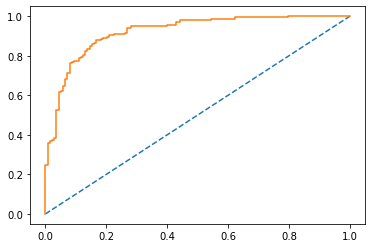

In [34]:
#LogisticRegression
probabilityValues=classimodel.predict_proba(features)[:,1]
#AUC계산
auc=roc_auc_score(label,probabilityValues)
print(auc)

fpr,tpr,threshold=roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

0.8049407114624506


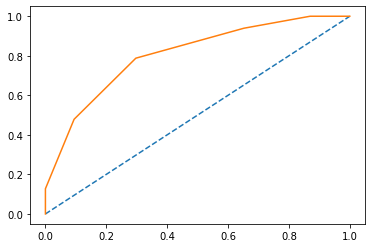

In [35]:
#KNeighborsClassifier
probabilityValues=knnmodel.predict_proba(features)[:,1]

auc=roc_auc_score(label,probabilityValues)
print(auc)

fpr,tpr,threshold=roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

0.9104084321475626


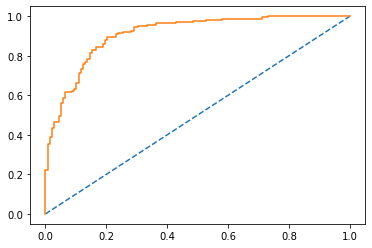

In [37]:
#naive bayes
probabilityValues=NBmodel.predict_proba(features)[:,1]

auc=roc_auc_score(label,probabilityValues)
print(auc)

fpr,tpr,threshold=roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

0.7574440052700921


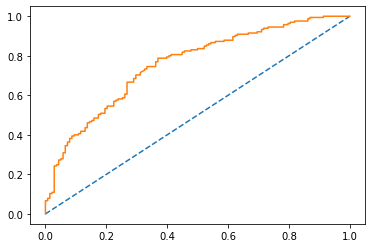

In [38]:
#SVC
probabilityValues=svcmodel.predict_proba(features)[:,1]

auc=roc_auc_score(label,probabilityValues)
print(auc)

fpr,tpr,threshold=roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

## 7. Conclusion
모델과 ROC 곡선에 따르면 데이터 세트에 가장 적합한 모델을 찾았습니다. 로지스틱 회귀 알고리즘이 최상의 결과를 제공합니다.